## Problem Statement : 
You are the sales manager for "BeerMart", an online beer store in the United States. You want to build a recommendation system (collaborative) for your store, where customers will be recommended the beer that they are most likely to buy. You collect data about the ratings that the customers have given in the past. 

### Data Description:
Description: Each record includes a beer's name and the user's name, along with the ratings he/she has given to the beer. All ratings are on a scale from 1 to 5, with 5 being the best rating.

#### *_Contributor : Ashutosh Kumar_* 
#### *_Contact Details : ashutoshind2017@outlook.com_* 


  
_Python version : Python 3.7.1, IDE = Anaconda Jupyter ,conda version conda 4.8.3_
  


## Recommended System Notebook Flow:
- User based recommendation
- User based prediction
- Item based recommendation
- Item based prediction
- Evaluation

In [25]:
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt2
import seaborn as sns

# Reading ratings file
beer = pd.read_csv('beer_data.csv')

In [26]:
beer.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [27]:
# Checking datatypes, NUlls etc:
print(beer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_beerid         475984 non-null  int64  
 1   review_profilename  475884 non-null  object 
 2   review_overall      475984 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB
None


## Data preparation:

### Choose only those beers that have at least N number of reviews.
Figure out an appropriate value of N using EDA; this may not have one correct answer, but you should not choose beers that have an extremely low number of ratings.


In [28]:
# Finding the distinct beer and its counts in dataset :
counts = beer['beer_beerid'].value_counts().to_dict()

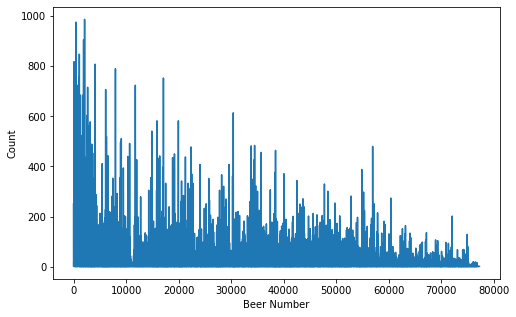

In [29]:
lists = sorted(counts.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt2.figure(figsize=(8,5))
plt2.plot(x, y)
plt2.xlabel("Beer Number")
plt2.ylabel("Count")
plt2.show()

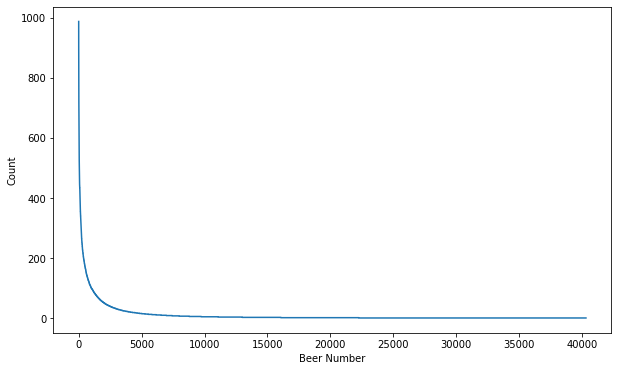

In [30]:
#plt.plot(counts)
plt.figure(figsize= (10,6))
plt.xlabel("Beer Number")
plt.ylabel("Count")
plt.plot(range(len(counts)), list(counts.values()))
plt.show()

In [31]:
# We can infer from above plots that we can take the minimum cut-off as 40 for going ahead as minimum number of beers datapoint 
# for each of the beer.

In [32]:
# Perform the filtering :
beer = beer.groupby('beer_beerid').filter(lambda x: len(x) >= 40)

In [33]:
# Drop duplicate datas:
beer.drop_duplicates()

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
18,25414,NJpadreFan,4.0
19,25414,vacax,2.5
20,25414,mikesgroove,4.0
21,25414,hdofu,4.0
...,...,...,...
475763,12172,charlzm,4.5
475764,12172,Viggo,3.5
475765,12172,grub,4.5
475766,12172,sinstaineddemon,4.5


## Data exploration

#### What are the unique values of ratings?

In [34]:
unique_ratings = beer.review_overall.unique()
print(unique_ratings)
print(len(unique_ratings))

[3.  4.  2.5 3.5 5.  4.5 2.  1.5 1. ]
9


In [35]:
# So there are 9 different ratings for the ratings from 1 to 5.

#### Visualise the rating values and notice:
    The average beer ratings
    The average user ratings
    The average number of ratings given to the beers
    The average number of ratings given by the users


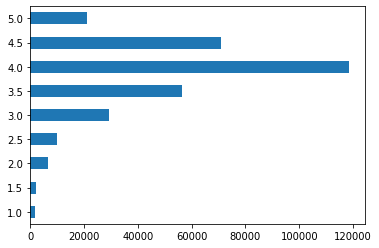

In [36]:
beer['review_overall'].value_counts().sort_index().plot.barh()

In [37]:
# So the highest number of ratings is 4.0 by the users for beer.

### The average beer ratings:

In [38]:
#beer.groupby('review_overall').mean()
beer["review_overall"].mean()

3.875077036854431

In [39]:
# On an average the beer has got rating of 3.87

In [40]:
beer_rating = pd.pivot_table(data=beer, index= 'beer_beerid',aggfunc='mean')
beer_rating

,review_overall
beer_beerid,
5,3.553097
6,3.711462
7,3.317961
10,3.883562
14,3.830508
...,...
74530,3.989362
74548,3.770000
74579,3.730000


In [41]:
beer_rating.reset_index(inplace=True)

Text(0, 0.5, 'Review given for beer')

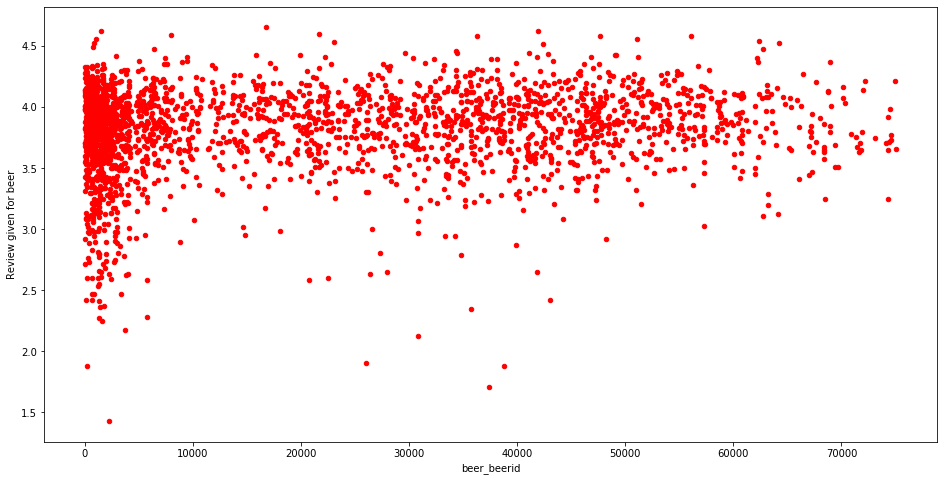

In [54]:
beer_rating.plot(x ='beer_beerid', y='review_overall', kind = 'scatter',figsize=(16,8),c='r')
plt.ylabel("Review given for beer")

### The average user ratings: 

In [43]:
user_rating = pd.pivot_table(data=beer, index= 'review_profilename',values= 'review_overall',aggfunc='mean')
user_rating

,review_overall
review_profilename,
0110x011,4.333333
01Ryan10,5.000000
04101Brewer,4.000000
05Harley,4.140625
0beerguy0,4.166667
...,...
zymurgy4all,3.750000
zymurgywhiz,4.250000
zythus,4.166667


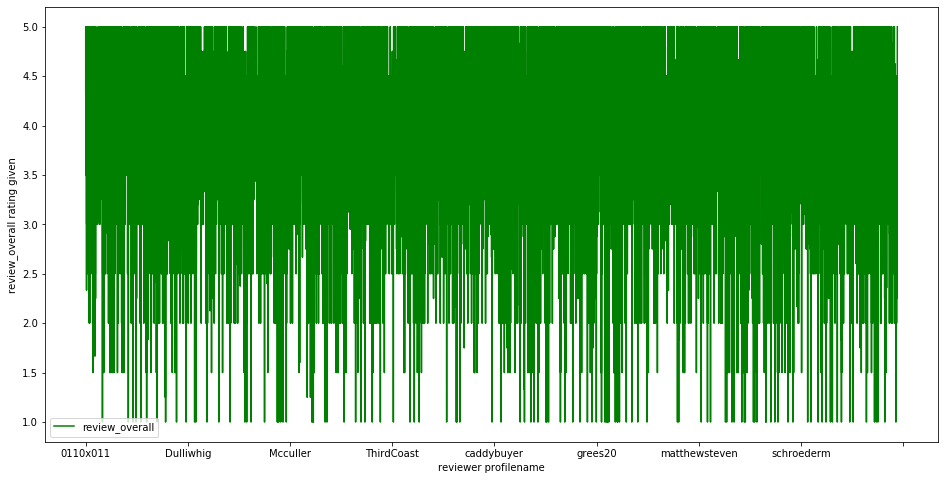

In [53]:
user_rating.reset_index(inplace=True)

#plt.scatter(x=user_rating['review_profilename'], y=user_rating['review_overall'],c="g", alpha=0.5, label="Rating")
#sns.regplot(x=user_rating["review_profilename"], y=user_rating["review_overall"])

user_rating.plot(x ='review_profilename', y='review_overall', kind = 'line',figsize=(16,8),c='g')

plt.xlabel("reviewer profilename")
plt.ylabel("review_overall rating given")
#plt.legend(loc='upper left')
plt.show()

### The average number of ratings given to the beers:

In [45]:
beer_rating2 = pd.pivot_table(data=beer, index= 'beer_beerid',aggfunc='count',values= 'review_overall')
beer_rating2.reset_index(inplace=True)
beer_rating2

,beer_beerid,review_overall
0,5,113
1,6,253
2,7,206
3,10,219
4,14,59
...,...,...
2496,74530,47
2497,74548,50
2498,74579,50
2499,74986,129


Text(0, 0.5, 'Total count for beer')

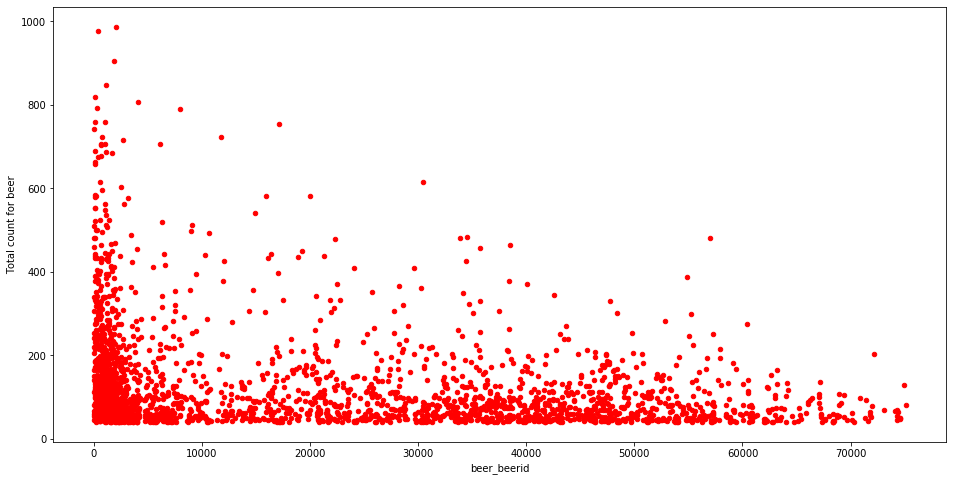

In [51]:
beer_rating2.plot(x ='beer_beerid', y='review_overall', kind = 'scatter',figsize=(16,8),c='r')
plt.xlabel("beer_beerid")
plt.ylabel("Total count for beer")

### The average number of ratings given by the users

In [47]:
user_rating2 = pd.pivot_table(data=beer, index= 'review_profilename',values= 'review_overall',aggfunc='count')
user_rating2.reset_index(inplace =True)
user_rating2

,review_profilename,review_overall
0,0110x011,30
1,01Ryan10,1
2,04101Brewer,1
3,05Harley,32
4,0beerguy0,3
...,...,...
19850,zymurgy4all,28
19851,zymurgywhiz,2
19852,zythus,3
19853,zyzygy,3


Text(0, 0.5, 'Total count for ratings')

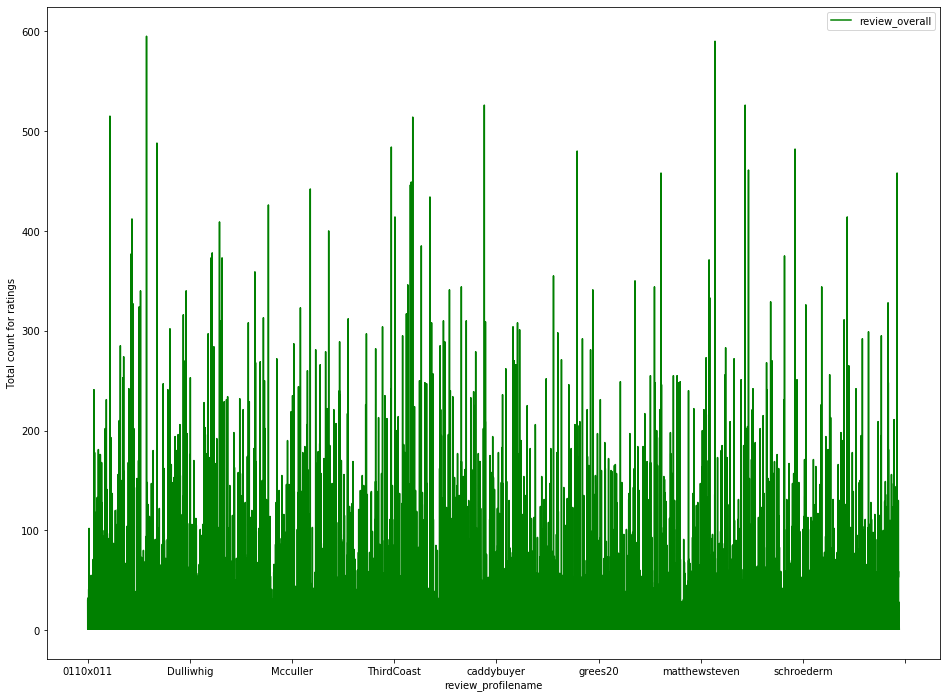

In [52]:
user_rating2.plot(x ='review_profilename', y='review_overall', kind = 'line',figsize=(16,12),c='g')
plt.xlabel("review_profilename")
plt.ylabel("Total count for ratings")

## Dividing the dataset into train and test

In [55]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(beer, test_size=0.30, random_state=30)

In [58]:
print(train.shape)
print(test.shape)

(221484, 3)
(94923, 3)


In [59]:
train.drop_duplicates(inplace=True)

C:\Users\Ashutosh\Anaconda3\envs\tensorenviron\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
# pivot ratings into beer features
df_beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
    #aggfunc='mean'
).fillna(0)

In [61]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_beer_features.shape

(17423, 2501)

### Copy train and test dataset
These dataset will be used to prediction and evaluation. 
- Dummy train will be used later for prediction of the beer which has not been rated by the user. To ignore the beer rated by the user, we will mark it as 0 during prediction. The beer not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beer rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [63]:
dummy_train = train.copy()
dummy_test = test.copy()

In [64]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 0)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [65]:
# The beer not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The beer not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [66]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01Ryan10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0runkp0s,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [67]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# User Similarity Matrix

## Using Cosine Similarity

In [68]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.         0.04917713 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.04917713 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [69]:
user_correlation.shape

(17423, 17423)

## Using adjusted Cosine 

### Here, not removing the NaN values and calculating the mean only for the beer rated by the user

In [70]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [71]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the beer for each user aroung 0 mean

In [72]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

#### Average rating given by the users

In [73]:
mean

array([4.44117647, 5.        , 4.20454545, ..., 2.5       , 4.        ,
       5.        ])

#### Overall average rating given by the user

In [74]:
average_mean = np.mean(mean)
average_mean

3.9418447012357825

In [75]:
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [76]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.        0.       -0.026683 ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [-0.026683  0.        1.       ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]]


In [77]:
users = beer_features.index[0:10]
users

Index(['0110x011', '01Ryan10', '05Harley', '0beerguy0', '0runkp0s', '0tt0',
       '1000Bottles', '1001111', '100floods', '1050Sudz'],
      dtype='object', name='review_profilename')

### Determine how similar the first 10 users are to each other and visualise it.

In [78]:
first_10_user = user_correlation[0:10, 0:10]
first_10_user

array([[ 1.        ,  0.        , -0.026683  ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.026683  ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.11443503,  0.        ,  0.        , -0.00941275,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.11443503,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        , -0.22858504,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        

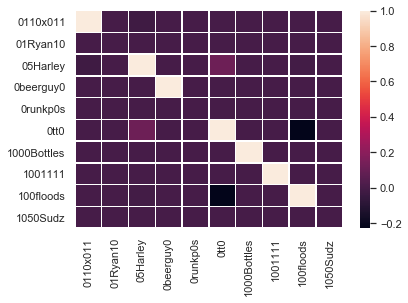

In [79]:
import seaborn as sns; sns.set()
ax = sns.heatmap(first_10_user, linewidths=.5, xticklabels=users, yticklabels=users)
plt.show()

## Prediction

### Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [80]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Rating predicted by the user (for beer rated as well as not rated) is the weighted sum of correlation with the beer rating (as present in the rating dataset). 

In [81]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[0.37703956, 1.6497313 , 1.31735362, ..., 0.24732023, 3.37035847,
        1.25382939],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.89949946, 5.83401645, 2.30017458, ..., 2.47578091, 8.08189335,
        2.90276629],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [82]:
user_predicted_ratings.shape

(17423, 2501)

### Since we are interested only in the beer not rated by the user, we will ignore the beer rated by the user by making it zero. 

In [83]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.377040,1.649731,1.317354,2.223604,0.438096,0.425406,1.524487,1.700918,5.558536,2.291709,...,0.475485,0.702296,0.261056,0.767071,0.929206,0.605775,0.821117,0.247320,3.370358,1.253829
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.899499,5.834016,2.300175,6.678468,0.473961,1.974386,4.549068,2.632098,10.161484,4.726743,...,1.448088,2.222089,0.778510,1.960979,0.830020,1.126415,1.333287,2.475781,8.081893,2.902766
0beerguy0,0.433696,1.389916,0.996079,1.191450,0.000000,0.349914,0.309078,0.291718,1.592473,2.002539,...,0.017111,0.000000,0.027027,0.066544,0.212295,0.000000,0.035836,0.066544,0.330516,0.179941
0runkp0s,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Finding the top 5 recommendation for the users

In [84]:
#For user 'cokes'
user_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
1093    34.073050
412     32.681024
276     32.115134
1904    30.968788
1013    29.933440
Name: cokes, dtype: float64

In [85]:
#For user 'genog'
user_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
1093    44.465930
2093    43.040616
412     40.228466
1904    36.636862
4083    36.260931
Name: genog, dtype: float64

In [86]:
#For user 'giblet'
user_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
2093    50.539298
412     44.091180
276     42.281989
1093    42.229611
104     41.892664
Name: giblet, dtype: float64

# Item Based Similarity

## Using Correlation

### Taking the transpose of the rating matrix to normalize the rating around the mean for different beer. In the user based similarity, we had taken mean for each user intead of each beer. 

In [87]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

review_profilename,0110x011,01Ryan10,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,1050Sudz,...,zulufactor,zumicroom,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the beer rating for each beer

In [88]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

#### Average rating given to the beer

In [89]:
mean

array([3.51785714, 3.72486772, 3.3234127 , ..., 3.63235294, 4.17619048,
       3.70175439])

#### Overall average rating given to the beer

In [90]:
average_mean = np.mean(mean)
average_mean

3.8088747277487345

In [91]:
df_subtracted.head()

review_profilename,0110x011,01Ryan10,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,1050Sudz,...,zulufactor,zumicroom,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 

In [92]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00 -1.51422027e-02  6.69264559e-02 ... -3.51165047e-02
   1.23818183e-02 -1.87314926e-04]
 [-1.51422027e-02  1.00000000e+00 -5.84020828e-02 ...  0.00000000e+00
   0.00000000e+00 -3.75729349e-02]
 [ 6.69264559e-02 -5.84020828e-02  1.00000000e+00 ... -8.06447999e-04
   6.91099266e-03 -3.31480143e-03]
 ...
 [-3.51165047e-02  0.00000000e+00 -8.06447999e-04 ...  1.00000000e+00
   1.95287640e-04 -2.86643422e-02]
 [ 1.23818183e-02  0.00000000e+00  6.91099266e-03 ...  1.95287640e-04
   1.00000000e+00 -1.57346150e-02]
 [-1.87314926e-04 -3.75729349e-02 -3.31480143e-03 ... -2.86643422e-02
  -1.57346150e-02  1.00000000e+00]]


### Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [93]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.00000000e+00, 0.00000000e+00, 6.69264559e-02, ...,
        0.00000000e+00, 1.23818183e-02, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.69264559e-02, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 6.91099266e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.95287640e-04, 0.00000000e+00],
       [1.23818183e-02, 0.00000000e+00, 6.91099266e-03, ...,
        1.95287640e-04, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

### 4.	Compute and visualise the similarity between the first 10 beers.

In [94]:
first_10_item = item_correlation[0:10, 0:10]
first_10_item

array([[1.        , 0.        , 0.06692646, 0.        , 0.        ,
        0.        , 0.        , 0.05046126, 0.        , 0.00873349],
       [0.        , 1.        , 0.        , 0.03683956, 0.03123523,
        0.02298067, 0.        , 0.        , 0.00285359, 0.        ],
       [0.06692646, 0.        , 1.        , 0.01007369, 0.        ,
        0.        , 0.01968371, 0.        , 0.00439021, 0.        ],
       [0.        , 0.03683956, 0.01007369, 1.        , 0.04236107,
        0.        , 0.02161397, 0.        , 0.03617494, 0.        ],
       [0.        , 0.03123523, 0.        , 0.04236107, 1.        ,
        0.        , 0.00151686, 0.        , 0.00573526, 0.        ],
       [0.        , 0.02298067, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.03060843, 0.01360203],
       [0.        , 0.        , 0.01968371, 0.02161397, 0.00151686,
        0.        , 1.        , 0.02212498, 0.        , 0.        ],
       [0.05046126, 0.        , 0.       

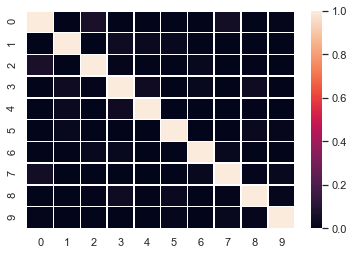

In [95]:
import seaborn as sns; sns.set()
ax = sns.heatmap(first_10_item, linewidths=.5)
plt.show()

# Prediction

In [96]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.15173912, 0.46258696, 0.09924994, ..., 0.41054925, 0.35855713,
        0.3520352 ],
       [0.        , 0.06231052, 0.10142035, ..., 0.        , 0.08584246,
        0.        ],
       [0.75747451, 0.61879824, 0.35855703, ..., 0.2268206 , 0.95411268,
        0.3279576 ],
       ...,
       [0.        , 0.02311737, 0.        , ..., 0.        , 0.00202463,
        0.02176985],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04499089, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [97]:
item_predicted_ratings.shape

(17423, 2501)

In [98]:
dummy_train.shape

(17423, 2501)

### Filtering the rating only for the beer not rated by the user for recommendation

In [99]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.151739,0.462587,0.099250,0.353273,1.002922,0.911247,0.437399,0.663825,0.843485,0.543371,...,0.515676,0.634195,0.101620,0.201565,0.304395,0.409706,0.645572,0.410549,0.358557,0.352035
01Ryan10,0.000000,0.062311,0.101420,0.000000,0.000000,0.000000,0.000000,0.059548,0.246709,0.000000,...,0.212076,0.000000,0.048571,0.020489,0.129365,0.000000,0.000000,0.000000,0.085842,0.000000
05Harley,0.757475,0.618798,0.358557,1.011857,0.310950,0.967663,0.570303,0.220745,0.955538,0.676769,...,0.203434,0.655377,0.428154,0.497157,0.238566,0.203186,0.406884,0.226821,0.954113,0.327958
0beerguy0,0.228807,0.203277,0.000000,0.068207,0.039723,0.206620,0.167585,0.011229,0.000000,0.101703,...,0.000000,0.000000,0.100169,0.024155,0.030472,0.034365,0.000000,0.000000,0.038811,0.039113
0runkp0s,0.018828,0.000000,0.000000,0.024566,0.023662,0.000000,0.000000,0.151132,0.031393,0.056454,...,0.000000,0.018335,0.000000,0.044039,0.000000,0.000000,0.000000,0.000000,0.003202,0.000000


### Top 5 prediction for the users

In [100]:
#For user 'cokes'
item_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
21363    14.283832
44461    13.114694
60886    12.997481
8116     12.142479
35924    12.099351
Name: cokes, dtype: float64

In [101]:
#For user 'genog'
item_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
21363    4.366401
7799     4.114601
34203    4.075148
39965    4.036933
10301    3.996373
Name: genog, dtype: float64

In [102]:
#For user 'giblet'
item_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
36378    4.201705
27190    3.775196
48434    3.690582
147      3.546985
259      3.539134
Name: giblet, dtype: float64

# Evaluation

### Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the beer already rated by the user insead of predicting it for the beer not rated by the user. 

## Using User Similarity

In [103]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [104]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.55586425, 0.89209978, 0.41653897, ..., 0.29752628, 0.16372797,
        0.5952927 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.21063232, 0.1143818 , ..., 0.33975725, 0.        ,
        0.11475506],
       ...,
       [0.73505527, 0.83405134, 0.89416916, ..., 0.28131682, 1.63850945,
        0.41872667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0549816 , 0.46071083, 1.44107623, ..., 0.20456857, 0.08280173,
        0.        ]])

### Doing prediction for the beer rated by the user

In [105]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [106]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the RMSE for only the beer rated by user. For  RMSE, normalising the rating to (1,5) range. 

In [107]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [108]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [109]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [110]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.981598441981908


## Using Item similarity

In [111]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [112]:
test_item_correlation.shape

(2501, 2501)

In [113]:
test_beer_features.shape

(2501, 12673)

In [114]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [116]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


### Finding RMSE

In [117]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.987447042928774


#### Conclusion: Item based similarity is performing slightly better than user based similarity. So, it should be deployed. 